# Bab 1: Introduction

Name: Mohammad Dandy Goesti

Dataset: Bank Customer Churn Prediction

Problem Statement/Objective:   

In the banking industry, retaining consumers is critical to remain profitable and uphold its good reputation. One major difficulty is client churn, which is the phenomenon of customers leaving the bank. Banks can prevent the loss of important clients by taking proactive steps, such focused retention campaigns, to identify prospective churners in advance. This project aim to create a system to predict a churn status of Bank customer. The dataset is obtained from Kaggle which contains information about customers. The process includes feature engineering, training model with some algorithms, model evaluation with recall,accuracy, precision and f1-score. The project then deployed into huggingface with the end result is expected to be able to predict churn accurately, with duration of 4-5 days.


# Bab 2: Import Libraries

At this stage I will import the necessary libraries for analysis and prediction including libraries for algorithms and parameter tuning.

In [1]:
# Import Libraries that will be used in this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import phik
from phik import resources, report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn import metrics
from feature_engine.outliers import Winsorizer
import pickle

# Bab 3: Data Loading

At this stage, the data preparation process will be carried out before exploration and analysis continues. I will look at the information from the dataset and then I will change or delete the data according to the process required.

In [2]:
# Reading dataset
df_ori=pd.read_csv("Bank Customer Churn Prediction.csv")

# Duplicate original data 
df_raw = df_ori.copy()

# Show the first 10 data in the dataset with all columns set
pd.set_option("display.max_columns" , None)
df_raw.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# Show the last 10 data in the dataset with all columns set
df_raw.tail(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9990,15798964,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,15657105,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
# Checking dataset info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There are 10.000 rows and 12 columns with varied datatype.

In [5]:
# Show columns names
df_raw.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

Dropping the `customer_id` since it wont be usefull for analysis

In [6]:
# Drop unneeded columns
df_raw.drop(['customer_id'], axis=1,inplace=True)

Then proceed with calculating missing values.

In [7]:
# Calculating missing values
df_raw.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

From the dataset there are no missing values, then I will look at the number of duplicate data.

In [8]:
# Counts the number of duplicate data
df_raw.duplicated().sum()

0

There are no duplicate data

In [9]:
# Check shape of data
df_raw.shape

(10000, 11)

In [10]:
# View a brief description of the data
df_raw.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Average age of the customer is 38, with 5 month tenure, credit score 650 and 76k balance.
- The oldest customer is 92 and youngest 18.
- active member average is 0.51 it means that half of customer is an active member

In [11]:
# Save data to new csv
df_raw.to_csv('P1M2_dandy.csv', index=False)
print('Data Saved')

Data Saved


In [12]:
# Read a CSV format dataset that has been previously saved with pd.read_csv
df = pd.read_csv('P1M2_dandy.csv')

# Bab 4: Exploratory Data Analysis

In this section, we will explore the data, see the distribution of the data, and also find out the relationship between several variable columns in order to understand the data for further analysis.

Analyzing the distribution of `churn` in dataset

Churn Percentage = 1 is 20.369999999999997 %


[7963, 2037]

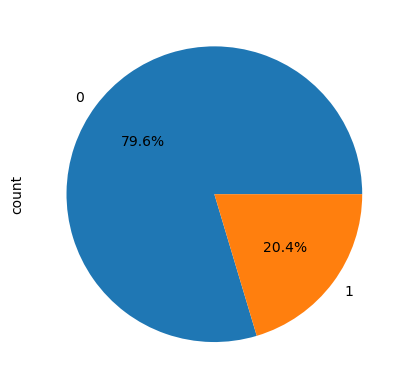

In [75]:
# Menghitung persentase defaulters
perc_churn = df.churn.sum() / len(df.churn)
print(f'Churn Percentage = 1 is {perc_churn*100} %')
df['churn'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.plot()

# Melihat total value
list(df['churn'].value_counts().values)

From the chart it can be seen that 20.4% or 2037 people will churn or leave, while 79.6% or 7963 people will not churn or not leave.

Analyzing the distribution of `countries` in dataset

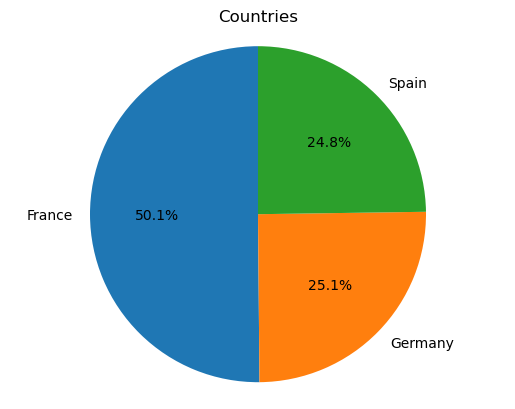

In [76]:
country_counts = df['country'].value_counts(normalize=True)
labels = country_counts.index
sizes = country_counts.values
plt.pie(sizes, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Countries')
plt.axis('equal')
plt.show()

From the Pie chart it can be seen that France dominates the data with 50.1% followed by Germany with 25.1 and Spain 24.8%.

Analyzing the `credit_score` between `country`

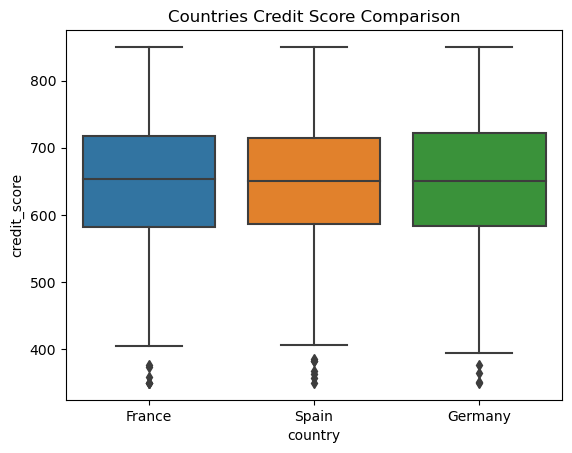

In [14]:
# Countries Credit Score Comparison
sns.boxplot(x='country', y='credit_score', data=df)
plt.title('Countries Credit Score Comparison')
plt.show()

From the boxplot, it seems there is no significant difference for `credit score` data. But for the outliers there seems more outliers in Spain than others 2. Also for Germany there is the lowest value below 400 for `credit score` that is not outliers.

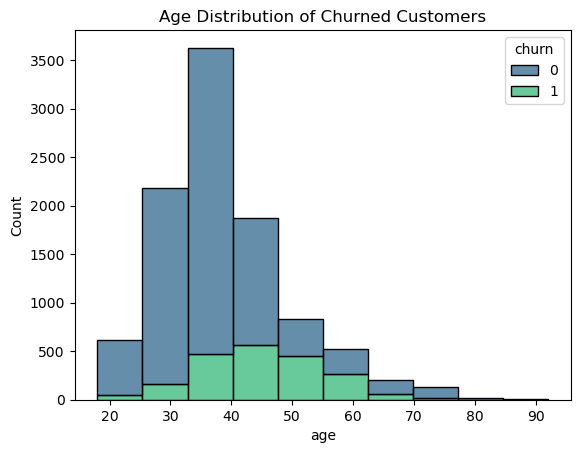

In [15]:
# Age Distribution of Churned Customers
sns.histplot(data=df, x='age', hue='churn', multiple='stack', bins=10, palette='viridis')
plt.title('Age Distribution of Churned Customers')
plt.show()

From the barchart, age of churned customer gathered between 20-70. The biggest churned customer is 40-50. Also for loyal customer, age 30-40 is the biggest loyal customer. Also the age distribution is right skewed.


Analyzing at the correlation between the churn and other variables with heatmap

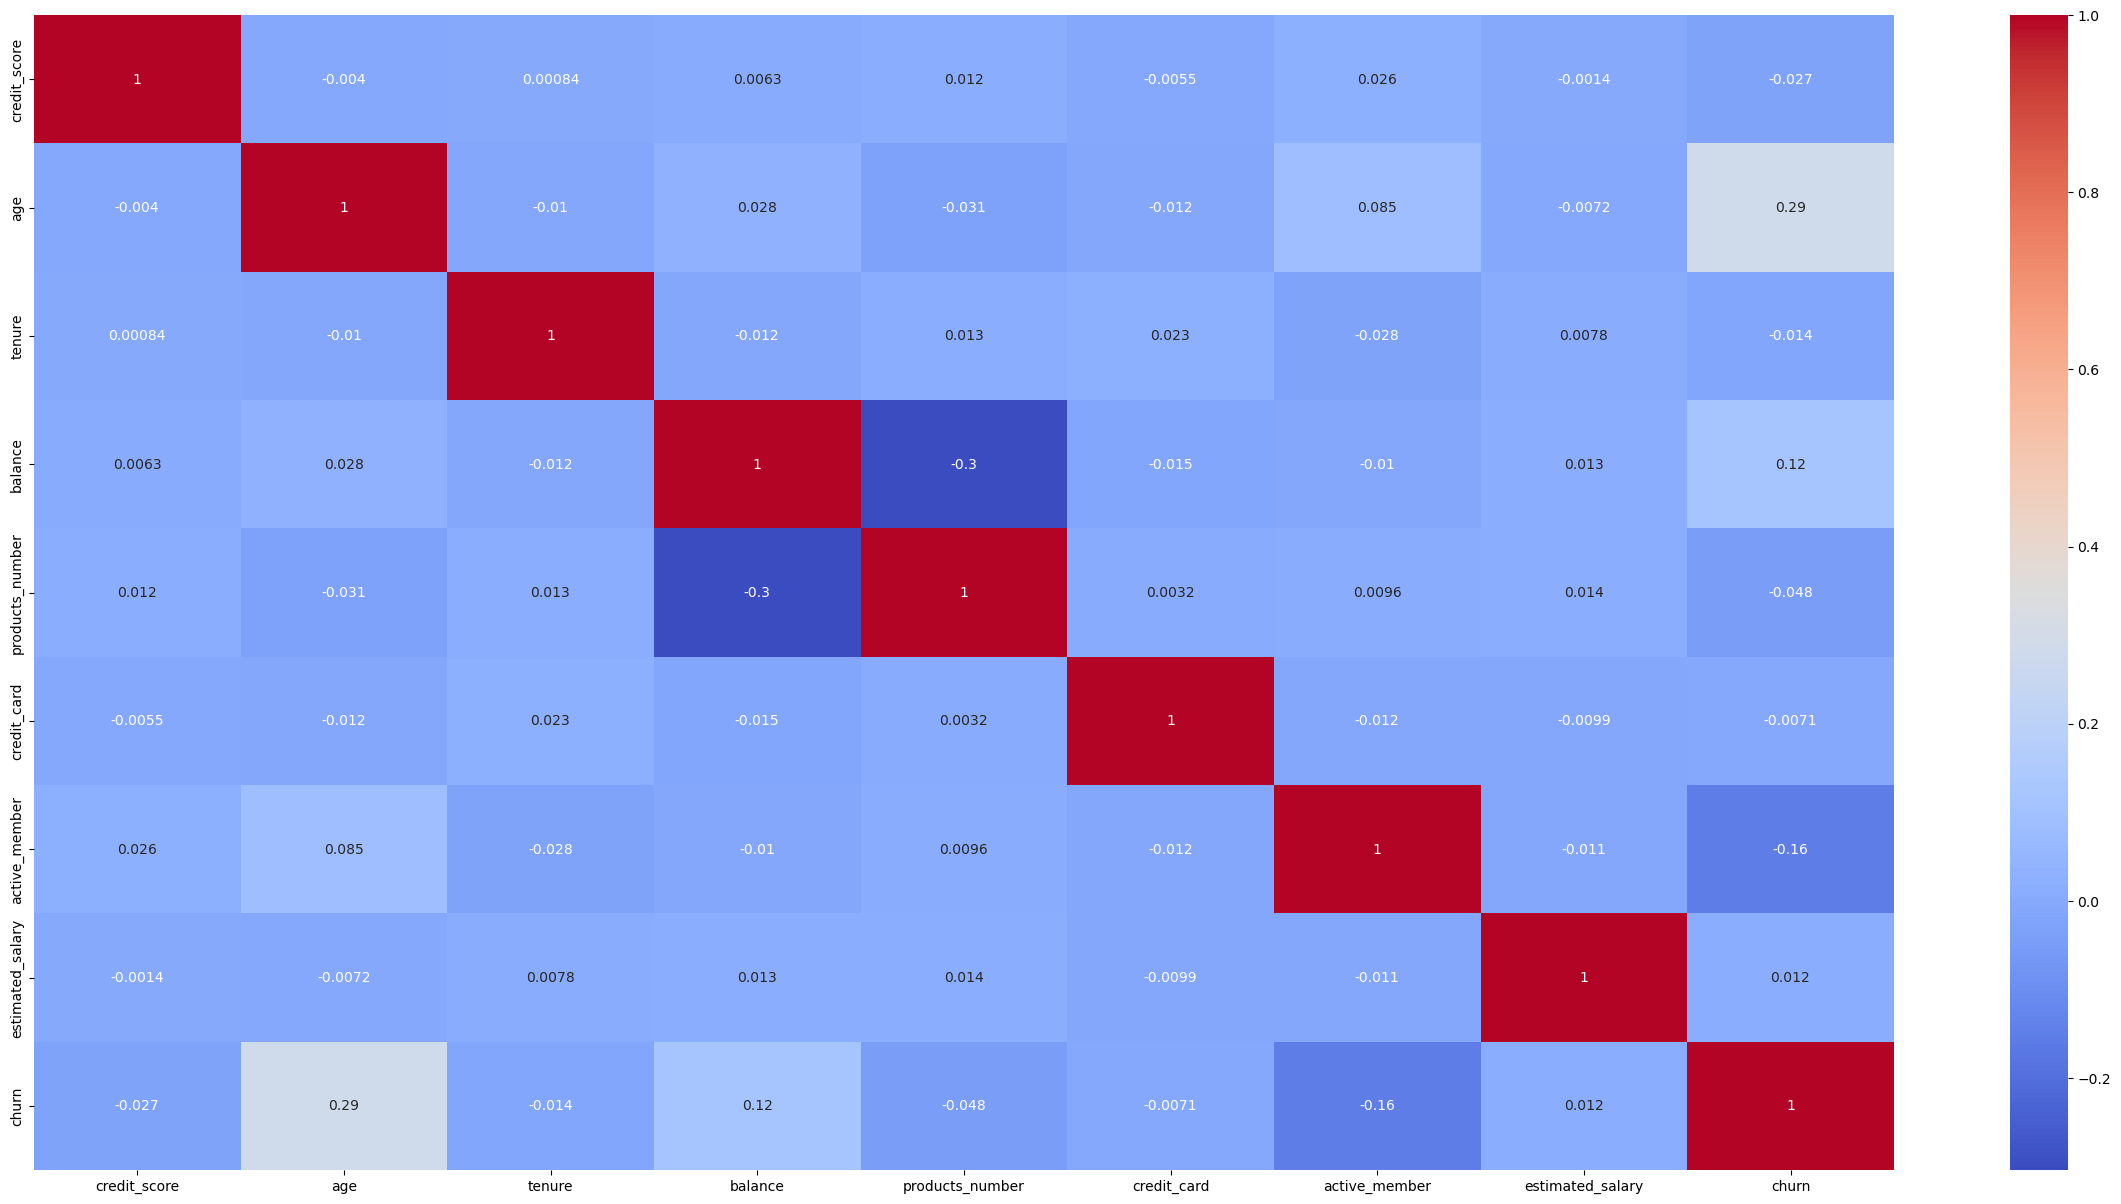

In [74]:
# creating a new dataFrame with only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# generate the heatmap for correlations
plt.figure(figsize=(30, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

There is no significant correaltion between variable to target, then i will move to the next process.

# Bab 5: Feature Engineering

At this stage I will select the features contained in the dataset to be used in creating the model. These features will have their data dimensions reduced or developed if deemed necessary, then they will be exploited by using them in various techniques.

In [17]:
# Display the 5 first data
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking Multicollinearity with VIF Score

Calculate the VIF score to see multicollinearity between independent variables, especially numerical variables.

In [18]:
# input considered features for numerical columns
considered_features = df[['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']]

In [19]:
# Select the independent variables for which you want to calculate VIF
X = considered_features

# Add a constant column to calculate VIF with an intercept (constant)
X['intercept'] = 1

# Initialize a dataframe to store the VIF results
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filter the VIF results to remove the intercept column
vif = vif[vif["Variable"] != "intercept"]

# Show dataframe
vif

,Variable,VIF
0,credit_score,1.000060
1,age,1.000969
2,tenure,1.000306
3,balance,1.001159
4,estimated_salary,1.000285


From 5 numerical column above the VIF score is low, so there are no multicollinearity

## Cardinality Check

This section is done to see the cardinality of categorical variable

In [20]:
# Counting total Cardinality pada categorical variabel
print('Number of categories in the variable country             : {}'.format(len(df.country.unique())))
print('Number of categories in the variable gender              : {}'.format(len(df.gender.unique())))
print('Number of categories in the variable products_number     : {}'.format(len(df.products_number.unique())))
print('Number of categories in the variable credit_card         : {}'.format(len(df.credit_card.unique())))
print('Number of categories in the variable active_member       : {}'.format(len(df.active_member.unique())))


Number of categories in the variable country             : 3
Number of categories in the variable gender              : 2
Number of categories in the variable products_number     : 4
Number of categories in the variable credit_card         : 2
Number of categories in the variable active_member       : 2


The categorical variables in this dataset are considered low cardinality

## Feature Selection

For selecting features, i will use phik matrix. Since phik can calculate correlation with numerical and categorical columns, i will put churn as target vs other variables.

In [21]:
# Set phi_k correlation matrix between churn and all other variables
phik_matrix = df.phik_matrix()
corr_churn = phik_matrix['churn'].sort_values(ascending=False)

# display results
corr_churn

interval columns not set, guessing: ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


churn               1.000000
products_number     0.565084
age                 0.487524
active_member       0.241939
balance             0.183365
gender              0.165422
country             0.104511
credit_score        0.096525
tenure              0.022895
credit_card         0.000000
estimated_salary    0.000000
Name: churn, dtype: float64

Then from the results there are 2 columns `credit_card ` and `estimated_salary` showing 0 correlation with `churn`. Hence, i will not put the columns that have no corelation into next analysis

In [22]:
# Select columns with correlation > 0.1 with churn
list_column = corr_churn[corr_churn>0]

# Put the new data with selected columns into df_new
df_new = df[list_column.index]

# Display data df_new
df_new

,churn,products_number,age,active_member,balance,gender,country,credit_score,tenure
0,1,1,42,1,0.00,Female,France,619,2
1,0,1,41,1,83807.86,Female,Spain,608,1
2,1,3,42,0,159660.80,Female,France,502,8
3,0,2,39,0,0.00,Female,France,699,1
4,0,1,43,1,125510.82,Female,Spain,850,2
...,...,...,...,...,...,...,...,...,...
9995,0,2,39,0,0.00,Male,France,771,5
9996,0,1,35,1,57369.61,Male,France,516,10
9997,1,1,36,1,0.00,Female,France,709,7
9998,1,2,42,0,75075.31,Male,Germany,772,3


## Splitting X dan y

Then the data set will be divided into X and y

In [23]:
# Divide the data with X as features and churn as y
X = df_new.drop(columns=['churn']) 
y = df_new['churn'] 

# Display X data
X

,products_number,age,active_member,balance,gender,country,credit_score,tenure
0,1,42,1,0.00,Female,France,619,2
1,1,41,1,83807.86,Female,Spain,608,1
2,3,42,0,159660.80,Female,France,502,8
3,2,39,0,0.00,Female,France,699,1
4,1,43,1,125510.82,Female,Spain,850,2
...,...,...,...,...,...,...,...,...
9995,2,39,0,0.00,Male,France,771,5
9996,1,35,1,57369.61,Male,France,516,10
9997,1,36,1,0.00,Female,France,709,7
9998,2,42,0,75075.31,Male,Germany,772,3


## Split data into Train set and Test set


In this section, i divide X and y into Train set and Test set.

In [24]:
# Divide the data into train set and test set, X is divided and y is also divided
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21) #random_state untuk menetapkan data, klau tidak diisi data jadi random tiap di run

# Calculates total data on X_train and X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
# print("X_inference shape:", X_inference.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# print("y_inference shape:", y_inference.shape)
X_train.head()


X_train shape: (8000, 8)
X_test shape: (2000, 8)
y_train shape: (8000,)
y_test shape: (2000,)


,products_number,age,active_member,balance,gender,country,credit_score,tenure
5504,2,32,0,120452.40,Male,France,786,2
5307,1,49,0,0.00,Female,France,534,7
1684,1,24,0,140453.91,Female,France,613,7
2441,2,29,1,0.00,Male,Spain,735,10
0,1,42,1,0.00,Female,France,619,2


## Divide numerical and categorical 

Followed by defining Numerical for X_train and X_test.

In [25]:
# Select numerical columns from X_train
X_train_num = X_train[['age', 'balance', 'tenure', 'credit_score']]

# Select numerical columns from X_test
X_test_num = X_test[['age', 'balance', 'tenure', 'credit_score']]

In [26]:
# Show dataframe of X_train_num
X_train_num

,age,balance,tenure,credit_score
5504,32,120452.40,2,786
5307,49,0.00,7,534
1684,24,140453.91,7,613
2441,29,0.00,10,735
0,42,0.00,2,619
...,...,...,...,...
9336,49,159458.53,9,695
48,38,103391.38,2,550
8964,37,96776.49,9,469
5944,43,114091.38,4,696


In [27]:
# Show dataframe of X_test_num
X_test_num

,age,balance,tenure,credit_score
3644,32,0.00,3,593
1828,31,0.00,9,547
6661,36,0.00,4,820
9216,30,0.00,10,724
5911,33,0.00,4,752
...,...,...,...,...
1790,74,108071.36,3,697
7512,50,153590.73,6,641
3144,55,81370.07,1,648
6231,48,106396.48,1,631


Next i also defining Categorical for X_train and X_test

In [28]:
# Select categorical columns from X_train
X_train_cat = X_train[['products_number', 'active_member', 'gender', 'country']]

# Select categorical columns from X_test
X_test_cat = X_test[['products_number', 'active_member', 'gender', 'country']]

In [29]:
# Show dataframe of X_train_cat
X_train_cat

,products_number,active_member,gender,country
5504,2,0,Male,France
5307,1,0,Female,France
1684,1,0,Female,France
2441,2,1,Male,Spain
0,1,1,Female,France
...,...,...,...,...
9336,1,0,Male,France
48,1,1,Male,Germany
8964,1,1,Male,Spain
5944,1,1,Male,Germany


In [30]:
# Show dataframe of X_test_cat
X_test_cat

,products_number,active_member,gender,country
3644,2,1,Female,France
1828,2,0,Female,Spain
6661,2,0,Male,France
9216,2,1,Male,France
5911,2,1,Male,France
...,...,...,...,...
1790,2,1,Female,Germany
7512,2,1,Male,France
3144,1,1,Male,Spain
6231,1,1,Male,Germany


## Handling Outliers

In this process I will look for outliers in the data, and if there are any, I will handle them, either dropping or capping

In [31]:
# Checking the skewnes to see the data distribution on X_train_num
print('Distribution of column :\n',X_train_num.skew())

Distribution of column :
 age             0.994799
balance        -0.140176
tenure          0.012745
credit_score   -0.068472
dtype: float64


In this data there are now skewness morethan 1, which mean the data is normaly skewed. But i will try to capping the the outliers 

In [32]:
# Capping on numerical variable
winsorizer_outliers = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['credit_score', 'age', 'tenure', 'balance'])

X_train_num_capped = winsorizer_outliers.fit_transform(X_train_num)
X_test_num_capped = winsorizer_outliers.transform(X_test_num)

In [33]:
# display data
X_train_num_capped

,age,balance,tenure,credit_score
5504,32,120452.40,2,786
5307,49,0.00,7,534
1684,24,140453.91,7,613
2441,29,0.00,10,735
0,42,0.00,2,619
...,...,...,...,...
9336,49,159458.53,9,695
48,38,103391.38,2,550
8964,37,96776.49,9,469
5944,43,114091.38,4,696


Here i create 2 variable to put the numerical and categorical data for Preprocessor input 

In [34]:
# Create Numerical and Categorical Columns

num_col = X_train_num_capped.columns.tolist()
cat_col = X_train_cat.columns.tolist()

# Display Numerical column and Categorical column
print('Numerical Columns:', num_col)
print('Categorical Columns:', cat_col)

Numerical Columns: ['age', 'balance', 'tenure', 'credit_score']
Categorical Columns: ['products_number', 'active_member', 'gender', 'country']


## Preprocessor

This section will prepare the data before entering it into the model pipeline. Create a numerical pipeline for feature scaling using StandardScaler. Followed by creating a categorical pipeline and performing feature encoding using OneHotEncoder.
In this project i will use OneHotEncoder since it is suitable for nominal variables where there is no inherent order among categories.

In [35]:
 #Create a numerical pipeline and process it using StandardScaler
numerical_pipeline = Pipeline([
    ("scaler", StandardScaler())
])
# Create a categorical pipeline and process it using OneHotEncoder
categorical_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown='infrequent_if_exist',sparse=False))
])

Then insert the appropriate columns into the numerical and categorical pipeline and then use the ColumnTransformer to apply them to the preprocessor that will be used in the model pipeline.

In [36]:
# Making the preprocessor as a process that includes a scaler and encoder
preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, num_col),
    ("categoric", categorical_pipeline, cat_col)
])

Here, i will concante the previously splitted numerical and categorical data into X_train_final and X_test_final then putting the data into dataframe

In [37]:
# use np.concatenate to Concate columns
X_train_final = np.concatenate([X_train_num_capped,X_train_cat],axis=1)
X_test_final = np.concatenate([X_test_num_capped,X_test_cat],axis=1)

In [38]:
# creating data frame for the data
X_train_final = pd.DataFrame(X_train_final,columns=num_col+cat_col)
X_test_final = pd.DataFrame(X_test_final,columns=num_col+cat_col)

In [39]:
# display data
X_train_final

,age,balance,tenure,credit_score,products_number,active_member,gender,country
0,32.0,120452.4,2.0,786.0,2,0,Male,France
1,49.0,0.0,7.0,534.0,1,0,Female,France
2,24.0,140453.91,7.0,613.0,1,0,Female,France
3,29.0,0.0,10.0,735.0,2,1,Male,Spain
4,42.0,0.0,2.0,619.0,1,1,Female,France
...,...,...,...,...,...,...,...,...
7995,49.0,159458.53,9.0,695.0,1,0,Male,France
7996,38.0,103391.38,2.0,550.0,1,1,Male,Germany
7997,37.0,96776.49,9.0,469.0,1,1,Male,Spain
7998,43.0,114091.38,4.0,696.0,1,1,Male,Germany


In [40]:
# display
X_test_final

,age,balance,tenure,credit_score,products_number,active_member,gender,country
0,32.0,0.0,3.0,593.0,2,1,Female,France
1,31.0,0.0,9.0,547.0,2,0,Female,Spain
2,36.0,0.0,4.0,820.0,2,0,Male,France
3,30.0,0.0,10.0,724.0,2,1,Male,France
4,33.0,0.0,4.0,752.0,2,1,Male,France
...,...,...,...,...,...,...,...,...
1995,74.0,108071.36,3.0,697.0,2,1,Female,Germany
1996,50.0,153590.73,6.0,641.0,2,1,Male,France
1997,55.0,81370.07,1.0,648.0,1,1,Male,Spain
1998,48.0,106396.48,1.0,631.0,1,1,Male,Germany


# Bab 6: Model Definition

This section is to define the models that will be used for the analysis. In this analysis the model used are K-Nearest Neighbors, Support Vector Machine, Decision Tree Classifier, Random Forest Classifier and AdaBoost Classifier.

In [41]:
# Define models
knn_model = KNeighborsClassifier()
svm_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()

# Bab 7: Model Training

In this stage, i will explore the steps involved in model training, including hyperparameter selection.

### Pipeline KNN

In [42]:
# Define pipeline for KNN
pipeline_KNN = Pipeline([("prep", preprocessor),("knn_model", KNeighborsClassifier())])

In [43]:
# Inserting X_train and y_train into pipeline
pipeline_KNN.fit(X_train_final, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'tenure',
                                                   'credit_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse=False))]),
                                                  ['products_number',
                                                   'active_member', 'gender',
                                                   'country'])])),
                ('knn_model', KNeighborsClassifier())])

In [44]:
# View the score of the pipeline against X_test and y_test
pipeline_KNN.score(X_test_final, y_test)

0.838

### Pipeline SVC

In [45]:
# Define pipeline for SVC
pipeline_SVC = Pipeline([("prep", preprocessor),("svm_model", SVC())])

In [46]:
# Inserting X_train and y_train into pipeline
pipeline_SVC.fit(X_train_final, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'tenure',
                                                   'credit_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse=False))]),
                                                  ['products_number',
                                                   'active_member', 'gender',
                                                   'country'])])),
                ('svm_model', SVC())])

In [47]:
# View the score of the pipeline against X_test and y_test
pipeline_SVC.score(X_test_final, y_test)

0.857

### Pipeline Decision Tree

In [48]:
# Define pipeline untuk DT
pipeline_DT = Pipeline([("prep", preprocessor),("dt_model", DecisionTreeClassifier())])

In [49]:
# Inserting X_train and y_train into pipeline
pipeline_DT.fit(X_train_final, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'tenure',
                                                   'credit_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse=False))]),
                                                  ['products_number',
                                                   'active_member', 'gender',
                                                   'country'])])),
                ('dt_model', DecisionTreeClassifier())])

In [50]:
# View the score of the pipeline against X_test and y_test
pipeline_DT.score(X_test_final, y_test)

0.791

### Pipeline Random Forest

In [51]:
# Define pipeline for RF
pipeline_RF = Pipeline([("prep", preprocessor),("rf_model", RandomForestClassifier())])

In [52]:
# Inserting X_train and y_train into pipeline
pipeline_RF.fit(X_train_final, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'tenure',
                                                   'credit_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse=False))]),
                                                  ['products_number',
                                                   'active_member', 'gender',
                                                   'country'])])),
                ('rf_model', RandomForestClassifier())])

In [53]:
# View the score of the pipeline against X_test and y_test
pipeline_RF.score(X_test_final, y_test)

0.8615

### Pipeline ADA Boost

In [54]:
# Define pipeline for ADABOOST
pipeline_ADA = Pipeline([("prep", preprocessor),("ada_model", AdaBoostClassifier())])

In [55]:
# Inserting X_train and y_train into pipeline
pipeline_ADA.fit(X_train_final, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'tenure',
                                                   'credit_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse=False))]),
                                                  ['products_number',
                                                   'active_member', 'gender',
                                                   'country'])])),
                ('ada_model', AdaBoostClassifier())])

In [56]:
# View the score of the pipeline against X_test and y_test
pipeline_ADA.score(X_test_final, y_test)

0.8635

### Cross Validation between Pipeline

In this section I will carry out Cross Validation between the 5 models above with the number of splits = 5. The reference metric used is recall, recall focuses on the ability of the model to capture all instances of the positive class, minimizing the number of false negatives.

In [57]:
# Define SKfold
skfold = StratifiedKFold(n_splits=5)

In [58]:
# Define Cross Validation for each model
cv_knn_model = cross_val_score(pipeline_KNN, X_train_final, y_train, cv=skfold, scoring = 'recall')
cv_svm_model = cross_val_score(pipeline_SVC, X_train_final, y_train, cv=skfold, scoring = 'recall')
cv_dt_model = cross_val_score(pipeline_DT, X_train_final, y_train, cv=skfold, scoring = 'recall')
cv_rf_model = cross_val_score(pipeline_RF, X_train_final, y_train, cv=skfold, scoring = 'recall')
cv_ada_model = cross_val_score(pipeline_ADA, X_train_final, y_train, cv=skfold, scoring = 'recall')

In [59]:
# Looking for the best model based on Cross_Val_score (mean)
name_model = []
cv_scores=0

for cv,name in zip([cv_knn_model, cv_svm_model, cv_dt_model, cv_rf_model, cv_ada_model],
                   ['knn_model','svm_model','dt_model','rf_model','ada_model']):
    # create output looping
    print(name)
    print('recall score - ALL - Cross Validation:', cv)
    print('recall score - Mean - Cross Validation:', cv.mean())
    print('recall score - std - Cross Validation:', cv.std())
    print('recall score - Range of Test Set:', (cv.mean()-cv.std()), '-', (cv.mean()+cv.std()))
    print('-'*50)
    
    # Create a condition to find the best model based on cv.Mean()
    if  cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

# Displays the results of the calculation
print('Best Model:',name_model)
print('Cross val mean from best model:', cv_scores)


knn_model
recall score - ALL - Cross Validation: [0.37003058 0.37614679 0.40978593 0.47560976 0.37195122]
recall score - Mean - Cross Validation: 0.4007048556724099
recall score - std - Cross Validation: 0.040159659918599475
recall score - Range of Test Set: 0.3605451957538104 - 0.44086451559100936
--------------------------------------------------
svm_model
recall score - ALL - Cross Validation: [0.39449541 0.40366972 0.39449541 0.42378049 0.35670732]
recall score - Mean - Cross Validation: 0.3946296710673529
recall score - std - Cross Validation: 0.021769858384584187
recall score - Range of Test Set: 0.37285981268276874 - 0.4163995294519371
--------------------------------------------------
dt_model
recall score - ALL - Cross Validation: [0.51681957 0.5412844  0.48318043 0.54878049 0.50914634]
recall score - Mean - Cross Validation: 0.5198422465876036
recall score - std - Cross Validation: 0.023515168663096334
recall score - Range of Test Set: 0.49632707792450725 - 0.5433574152506999

From the cross validation results, the best model is the dt_model or Decision Tree Classifier model with a mean of 0.51.

### Hyperparameter tuning with RandomizedSearch CV


Next i will perform Hyperparameter tuning for the best model of cross validation, namely the Decision Tree Classifier.

In [60]:
# Creating Parameter for Decision Tree Model
parameter = {'dt_model__criterion': ['gini','entropy'],
            'dt_model__splitter': ['best', 'random'],
            'dt_model__max_depth': [2, 3, 5, 10, 20],
            'dt_model__min_samples_split': [2, 5, 10, 20, 50],
            'dt_model__min_samples_leaf': [5, 10, 20, 50, 100]
            }
# Uses GridSearchCV as tuning parameter
random_dt = RandomizedSearchCV(pipeline_DT,param_distributions=parameter,n_jobs=-1, cv=5, random_state=21)
random_dt.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'balance',
                                                                                'tenure',
                                                                                'credit_score']),
                                                                              ('categoric',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                                              sparse=False))]),
                                                                               ['products_number',
                                                                                'active_member',
                                                                                'gender',
                                                                                'country'])])),
                                             ('dt_model',
                                              DecisionTreeClassifier())]),
                   n_jobs=-1,
                   param_distributions={'dt_model__criterion': ['gini',
                                                                'entropy'],
                                        'dt_model__max_depth': [2, 3, 5, 10,
                                                                20],
                                        'dt_model__min_samples_leaf': [5, 10,
                                                                       20, 50,
                                                                       100],
                                        'dt_model__min_samples_split': [2, 5,
                                                                        10, 20,
                                                                        50],
                                        'dt_model__splitter': ['best',
                                                               'random']},
                   random_state=21)

In [61]:
# View the best parameters
best_params_dt = random_dt.best_params_
best_params_dt

{'dt_model__splitter': 'best',
 'dt_model__min_samples_split': 5,
 'dt_model__min_samples_leaf': 20,
 'dt_model__max_depth': 10,
 'dt_model__criterion': 'entropy'}

In this Decision Tree Classifier model, the best parameters for criterion are `entropy` with max depth: 10, min_samples_leaf: 20 and min_samples_split': 5 ​​and splitter is best. Then proceed by entering it into the best estimator.

In [62]:
# Calculates grid scores for X train and Xtest
random_dt.score(X_train_final, y_train), random_dt.score(X_test_final, y_test)

(0.874, 0.8585)

Here i put down all the best parameter into best_dt for inference purpose later.

In [63]:
# Define best_dt with all the chosen parameter
best_dt = DecisionTreeClassifier(criterion= 'entropy',
max_depth= 10,
min_samples_leaf= 20,
min_samples_split= 5,
splitter= 'best')

In [64]:
# Define Best Estimator
best_estimator_dt = random_dt.best_estimator_
best_estimator_dt

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'tenure',
                                                   'credit_score']),
                                                 ('categoric',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 sparse=False))]),
                                                  ['products_number',
                                                   'active_member', 'gender',
                                                   'country'])])),
                ('dt_model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                        min_samples_leaf=20,
                                        min_samples_split=5))])

Then calculate the recall score from Random Forest Classifier

In [65]:
# Define function to check recall score

def performance_check(best_estimator_dt, X_train_final, y_train):
  y_pred = best_estimator_dt.predict(X_train_final)

  return recall_score(y_train, y_pred)

# Display the recall score

print('recall score - Train : ', performance_check(best_estimator_dt, X_train_final, y_train))
print('recall score - Test  : ', performance_check(best_estimator_dt, X_test_final, y_test))

recall score - Train :  0.531459987782529
recall score - Test  :  0.4825


From the model the result are Train recall : 0.53 and Test recall score: 0.48. The score is quite low but still Goodfit.
Then the model evaluation will be processed to display the confusing matrix.

# Bab 8: Model Evaluation

In this section, Decisiont Tree Classifier  will be assessed whether it works well or not. 
The evaluation will use several metrics, namely f1 score, precision, accuracy and recall. But the main metric is the recall score since recall focuses on the ability of the model to capture all instances of the positive class, minimizing the number of false negatives. It is particularly important in scenarios where missing positive instances is considered more critical than having false positives. Recall also useful when dealing with imbalanced datasets where the positive class is underrepresented.

precision - Test Set   :  0.7174721189591078
recall - Test Set   :  0.4825
accuracy - Test Set   :  0.8585
F1 Score - Test Set   :  0.5769805680119582 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1600
           1       0.72      0.48      0.58       400

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000
 

Confusion Matrix      : 


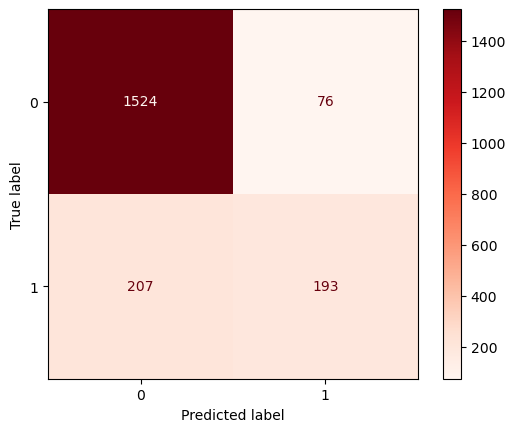

In [66]:
# Checking the best_estimator_dt  Model against the Test-Set

y_pred_test = best_estimator_dt.predict(X_test_final)

print('precision - Test Set   : ', precision_score(y_test, y_pred_test))
print('recall - Test Set   : ', recall_score(y_test, y_pred_test))
print('accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test))
print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(best_estimator_dt, X_test_final, y_test, cmap='Reds'))

After calculating the Decision Tree model, the recall score on the test set was 52%. In this model, even though the accuracy score is 79%, because the target data is imbalanced, the metrics used will not be appropriate. So in my opinion the right metric is the recall score.
From the confusion matrix you can see True Positive 193, False Positive 76, True Negative 1524 and False Negative 207. Based on confusion matrix the false negative data can be minimized as much, so in my opinion is good enough in this model.


In [67]:
# Predict Train-set dan Test-set

y_pred_train = best_estimator_dt.predict(X_train_final)
y_pred_test = best_estimator_dt.predict(X_test_final)
y_pred_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

--------------------------

In [68]:
# Perform the prediction 
Prediction=pd.DataFrame({"Actual":y_test,"Predicted":y_pred_test})
Prediction

,Actual,Predicted
3644,0,0
1828,0,0
6661,0,0
9216,0,0
5911,0,0
...,...,...
1790,0,0
7512,0,0
3144,0,0
6231,1,1


# Bab 9: Model Saving

This section is for saving the model and preprocessor

In [69]:
# Fit X_train through preprocessor and save to X_train_fe
X_train_fe = preprocessor.fit_transform(X_train)

In [70]:
# Then fit to best_dt
best_dt.fit(X_train_fe, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       min_samples_split=5)

In [71]:
# Save best_estimator_dt
with open('best_dt.pkl', 'wb') as file_1:
    pickle.dump(best_dt, file_1)

# Save preprocessor
with open('preprocessor.pkl', 'wb') as file_2:
    pickle.dump(preprocessor, file_2)



# Bab 10: Model Inference

This section is for inference in other notebook

In [72]:
# # Load file pipeline pkl
# with open('best_dt.pkl', 'rb') as file_1:
#     best_estimator_dt = pickle.load(file_1)

# # Load file preprocessor
# with open('preprocessor.pkl', 'rb') as file_2:
#     preprocessor = pickle.load(file_2)


# Bab 11: Conclusion

The conclusions I got will be divided into several parts:

Insight from EDA:
- About 20.4% or 2037 people are expected to move or leave the service, while 79.6% or 7963 people are expected to remain loyal.
- There are no significant differences in the credit score data, but there are more outliers in Spain. Also, in Germany there is a lowest value below 400 for the credit score which is not an outlier.
- Customers who switch are distributed in the 20-70 year age range, with peak churn occurring in the 40-50 year age group. The most loyal customers are in the 30-40 year age group, and the age distribution tends to be right-skewed.
- There is no significant correlation between other variables and target (churn), indicating the need for further analysis to identify factors causing churn.

Based on the Evaluation Model, conclusions can be drawn:

- After calculating the Decision Tree model, a recall score of 52% was obtained on the test set. Although this model's accuracy score reached 79%, it is important to note that because the target data is unbalanced, a more appropriate metric to evaluate is the recall score.

From a business perspective, insights that can be drawn from the analysis:
- There are 20.4% of total bank customers are expected to switch or leave the bank service. This indicates there are challenges in retaining some customers, and retention strategies may need to be strengthened.
- Further understanding of the factors influencing this age group may help in designing more effective retention strategies.
- Credit Score Management for different countries, from the credit score analysis, although there are no significant differences, it is worth noting that there are more outliers in Spain and the lowest score in Germany is below 400. This could be an area that needs further attention.

Further Improvement:

- Although the Decision Tree model provides positive results, further analysis and improvements to the model may be required. A deeper understanding of the features that influence a customer's decision to switch can help in the development of more effective strategies to minimize churn. 
From what i learn, there are imbalance in target variable. If resampling the data can be done correctly maybe the recall score can improve. For additional analysis, in the future it is possible to also carry out a weighted random forest model, such as this paper below.

Reference link : https://adiwijaya.staff.telkomuniversity.ac.id/files/2013/07/JFA-b-30.pdf

# Conceptual Problems

1. **Bagging** is an abbreviation of Bootstrap and Aggregation, it aim to increase the performance of machine learning models. 
To outperform the individual models, bagging combines the output of multiple models. When an individual model exhibits large variation or an inclination toward overfitting, bagging becomes particularly helpful.
It can solve overfitting data and sensitivity to variance of data.

    Bagging work with 3 steps:
- Bootstraping: creates several subsets of the training dataset through replacement and random data point selection. it can choose the same instance more than once when choosing a data point from the training dataset. Resulting, a value repeated 2 or more in a sample.
- Parallel training: Weak or base learners are then used to train these bootstrap samples separately and concurrently with one another.
- Aggregation: The final step, an average or the majority of the predictions are taken to compute a more accurate estimate, depending on the task  regression or classification.

2. Comparing **Random Forest VS ADA Boosting** work processes:
- **Random forest** only creates multiple decision trees using bootstrap data and randomly selects a subset of variables in each decision tree.
- **AdaBoost algorithm** creates a forest of stumps. Trees with only one branch and two leaves are called stumps. Then the second difference is the final prediction does not give the created stumps the same weight. This implies that when making decisions, stumps with significant inaccuracies have limited weight. The last difference is that while each stump aim to reduce the inaccuracy caused by the previous stumps, thats why the order of stump created is important.

3. **Cross Validation** is a technique to evaluate model performance. The goal of this technique is measuring to a degree which a model can generalize from training data unseen. Cross validation get more accurate assessment of model performance outside of the training dataset by use cross-validation.